In [18]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test)= \
    tf.keras.datasets.imdb.load_data(num_words=1000)

In [19]:
def one_hot_sequences(sequences, dimension=1000):
    results=numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index]=1.
    return results

In [20]:
X_train=one_hot_sequences(X_train)
X_test=one_hot_sequences(X_test)

In [29]:
#1. Dropout없는 버전
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

inputs = Input(shape=(1000,))
hidden1 = Dense(16, activation='relu')(inputs)
hidden2 = Dense(16, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

early_stopping = EarlyStopping()
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train, y_train
          , epochs=1000, batch_size=512
          , validation_split=0.2
          , callbacks=[early_stopping])

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6904 - loss: 0.5524 - val_accuracy: 0.8632 - val_loss: 0.3405
Epoch 2/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3141 - val_accuracy: 0.8566 - val_loss: 0.3323
Epoch 3/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.2964 - val_accuracy: 0.8590 - val_loss: 0.3285
Epoch 4/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.2708 - val_accuracy: 0.8602 - val_loss: 0.3279
Epoch 5/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8878 - loss: 0.2664 - val_accuracy: 0.8484 - val_loss: 0.3497


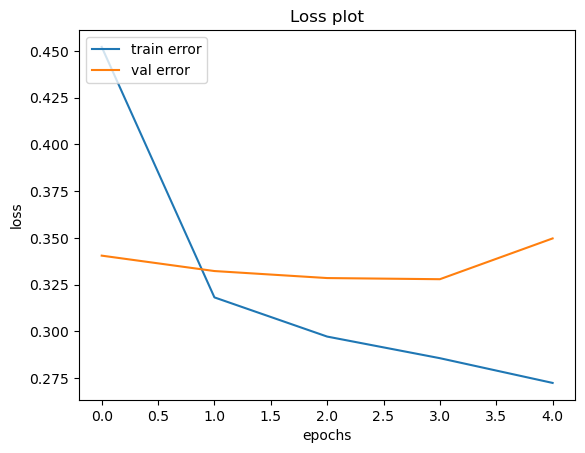

In [30]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc=history_dict['accuracy']
epochs=range(1, len(acc)+1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss plot")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

In [31]:
#2. Dropout 있는버전
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

inputs = Input(shape=(1000,))
hidden1 = Dense(16, activation='relu')(inputs)
hidden2 = Dropout(0.25)(hidden1)
hidden3 = Dense(16, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=inputs, outputs=output)

early_stopping = EarlyStopping()
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train, y_train
          , epochs=1000, batch_size=512
          , validation_split=0.2
          , callbacks=[early_stopping])

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,305 (63.69 KB)

 Trainable params: 16,305 (63.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7031 - loss: 0.5482 - val_accuracy: 0.8536 - val_loss: 0.3348
Epoch 2/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3279 - val_accuracy: 0.8612 - val_loss: 0.3263
Epoch 3/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.3039 - val_accuracy: 0.8584 - val_loss: 0.3303


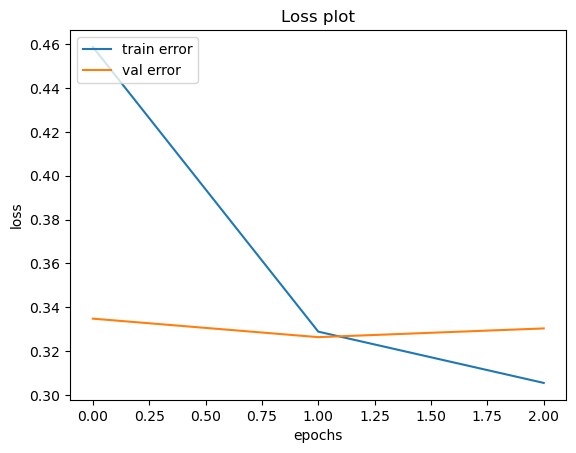

In [32]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc=history_dict['accuracy']
epochs=range(1, len(acc)+1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss plot")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

In [33]:
#Dropout을 넣은 버전의 validation_data loss가 좀 더 낮게 나왔다.